# YULU Hypothesis Testing

### About The Data

This dataset provides insights into the usage patterns of YULU bike sharing services. It includes a variety of factors such as weather conditions, time, and user type, which could influence bike rental behaviors.

#### Target Columns

* Casual: Count of Casual Users
* Registered: Count of Registered Users
* Count : Casual + Registered
* Note on Registration: YULU's policy requires a refundable security deposit of Rs 100 for registration. This aspect could influence user decisions to register and * use the service regularly.

#### Temperature Columns

* temp: Ambient temperature as measured by standard devices, in Celsius.
* atemp: 'Feels like' temperature, considering factors like humidity and wind, in Celsius.

#### Column Profiling:

* datetime: Date and time of the bike rental.

* season: Categorical variable representing the season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

* holiday: Indicates if the day is a public holiday (1: Holiday, 0: Non-holiday).

* workingday: Identifies working days (1: Working day, 0: Weekend or holiday).

* weather: Categorical variable representing weather conditions:
1. Clear, few clouds, partly cloudy.
2. Mist + cloudy, mist + broken clouds, mist + few clouds.
3. Light snow, light rain + thunderstorm + scattered clouds, light rain + scattered clouds.
4. Heavy rain + ice pellets + thunderstorm + mist, snow + fog.

* humidity: Relative humidity in percentage.

* windspeed: Wind speed in km/h.

* count: Total count of rented bikes, including both casual and registered users.

Goal:
Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
Select an appropriate test to check whether:

Working Day has effect on number of electric cycles rented✅

No. of cycles rented similar or different in different seasons✅

No. of cycles rented similar or different in different weather✅

Weather is dependent on season (check between 2 predictor variable)✅

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Library to help with statistical analysis
import scipy.stats as stats 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yulu-bike-sharing-data/yulu_bike_sharing_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/yulu-bike-sharing-data/yulu_bike_sharing_dataset.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


* Looks like the data is all numerical

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


* The datetime column is an object

In [4]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

* There are no missing values

In [5]:
df.duplicated().sum()

0

* There are no duplicates

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


* The dataset contains a balanced distribution of seasons.
* Most days are not holidays, and the majority of days are working days.
* Weather conditions are mostly favorable.
* There is a significant range in temperature, humidity, and windspeed, suggesting diverse weather conditions.
* Casual user counts are much lower on average compared to registered users, indicating more consistent usage by registered users.
* The total count of users varies widely, suggesting varying levels of demand possibly influenced by other factors in the dataset (like weather, working days, etc.).

In [7]:
# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract year and month into separate columns
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

# Drop the original datetime column if no longer needed
df = df.drop(columns=['datetime'])

# Rename the 'count' column to 'totalusers'
df.rename(columns={'count': 'totalusers'}, inplace=True)

df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalusers,year,month
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


### Question 1 - if working Day has effect on number of electric cycles rented

* Null Hypothesis (H₀): The number of electric cycles rented is the same on working days and non-working days. In other words, working days have no effect on the number of electric cycles rented.

* Alternative Hypothesis (H₁): The number of electric cycles rented is different on working days compared to non-working days. In other words, working days have an effect on the number of electric cycles rented.

Total users for all working days: 1430604
Total users for all non working days: 654872
Total users for all weedends: 597064
Total users for all holidays: 57808


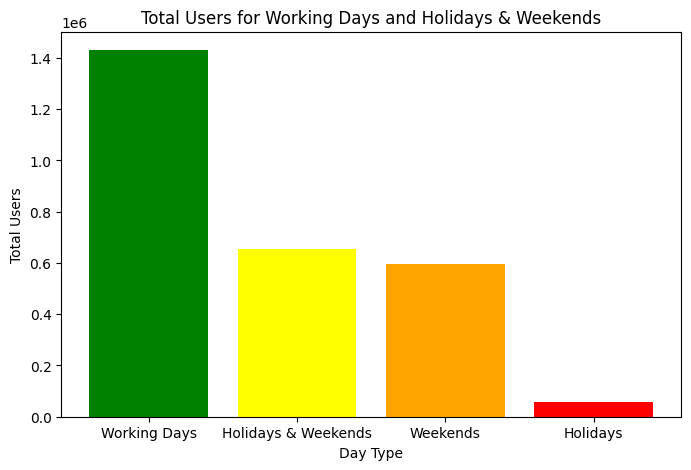

In [8]:
total_users_working_days = df[df['workingday'] == 1]['totalusers'].sum()

total_users_non_working_days = df[df['workingday'] == 0]['totalusers'].sum()

total_users_holiday = df[df['holiday'] == 1]['totalusers'].sum()

total_users_wekends = total_users_non_working_days - total_users_holiday

print(f"Total users for all working days: {total_users_working_days}")

print(f"Total users for all non working days: {total_users_non_working_days}")

print(f"Total users for all weedends: {total_users_wekends}")

print(f"Total users for all holidays: {total_users_holiday}")

labels = ['Working Days', 'Holidays & Weekends', 'Weekends', 'Holidays']
values = [total_users_working_days, total_users_non_working_days, total_users_wekends, total_users_holiday]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'yellow', 'orange', 'red' ])
plt.xlabel('Day Type')
plt.ylabel('Total Users')
plt.title('Total Users for Working Days and Holidays & Weekends')
plt.show()

* The visual shows that in total during the working days more bikes were rented compared to the non working days

Total registered users for all working days: 1244506
Total registered users for all non working days: 448835
Total registered users for all weekends: 406198
Total registered users for all holidays: 42637


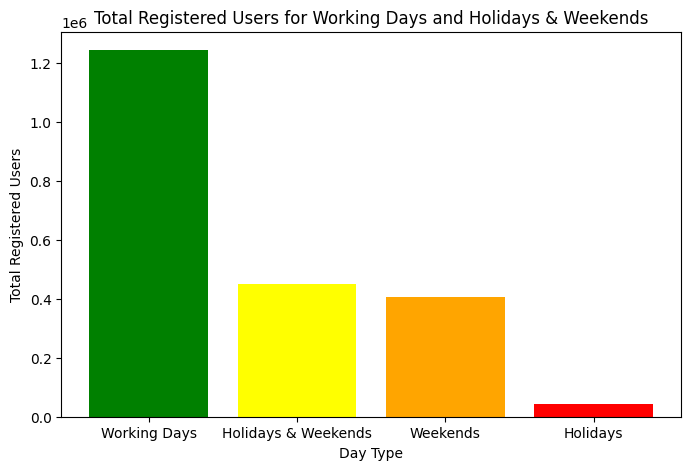

In [9]:
# Calculations for registered users
total_registered_working_days = df[df['workingday'] == 1]['registered'].sum()
total_registered_non_working_days = df[df['workingday'] == 0]['registered'].sum()
total_registered_holiday = df[df['holiday'] == 1]['registered'].sum()
total_registered_weekends = total_registered_non_working_days - total_registered_holiday

# Print statements
print(f"Total registered users for all working days: {total_registered_working_days}")
print(f"Total registered users for all non working days: {total_registered_non_working_days}")
print(f"Total registered users for all weekends: {total_registered_weekends}")
print(f"Total registered users for all holidays: {total_registered_holiday}")

# Data for plotting
labels = ['Working Days', 'Holidays & Weekends', 'Weekends', 'Holidays']
values = [total_registered_working_days, total_registered_non_working_days, total_registered_weekends, total_registered_holiday]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'yellow', 'orange', 'red'])
plt.xlabel('Day Type')
plt.ylabel('Total Registered Users')
plt.title('Total Registered Users for Working Days and Holidays & Weekends')
plt.show()

* The propotion of the rented bikes on working days vs the non working days for the redistered users is higher tha the propotion of the total users

Total casual users for all working days: 186098
Total casual users for all non working days: 206037
Total casual users for all weekends: 190866
Total casual users for all holidays: 15171


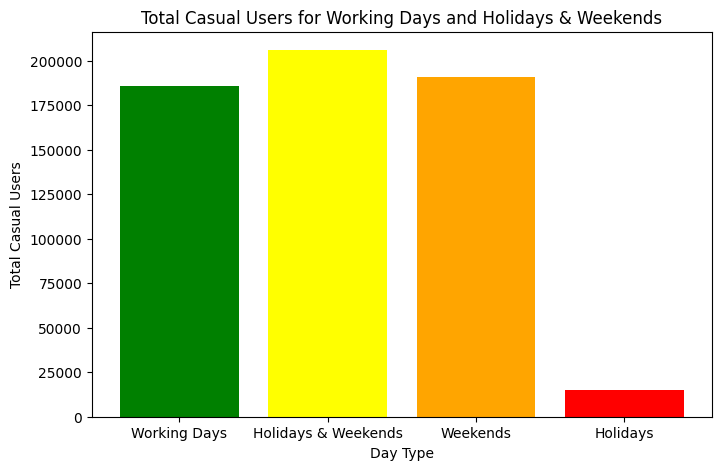

In [10]:
# Calculations for casual users
total_casual_working_days = df[df['workingday'] == 1]['casual'].sum()
total_casual_non_working_days = df[df['workingday'] == 0]['casual'].sum()
total_casual_holiday = df[df['holiday'] == 1]['casual'].sum()
total_casual_weekends = total_casual_non_working_days - total_casual_holiday

# Print statements
print(f"Total casual users for all working days: {total_casual_working_days}")
print(f"Total casual users for all non working days: {total_casual_non_working_days}")
print(f"Total casual users for all weekends: {total_casual_weekends}")
print(f"Total casual users for all holidays: {total_casual_holiday}")

# Data for plotting
labels = ['Working Days', 'Holidays & Weekends', 'Weekends', 'Holidays']
values = [total_casual_working_days, total_casual_non_working_days, total_casual_weekends, total_casual_holiday]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'yellow', 'orange', 'red'])
plt.xlabel('Day Type')
plt.ylabel('Total Casual Users')
plt.title('Total Casual Users for Working Days and Holidays & Weekends')
plt.show()

* During the holidays & weekends the casual users were more active in renting bikes

### Selecting appropriate test 

* A/B Test and p-value = 0.05

In [11]:
# Spliting the data into the two groups based on workingday
groupA = df[df['workingday'] == 0]['totalusers']
groupB = df[df['workingday'] == 1]['totalusers']

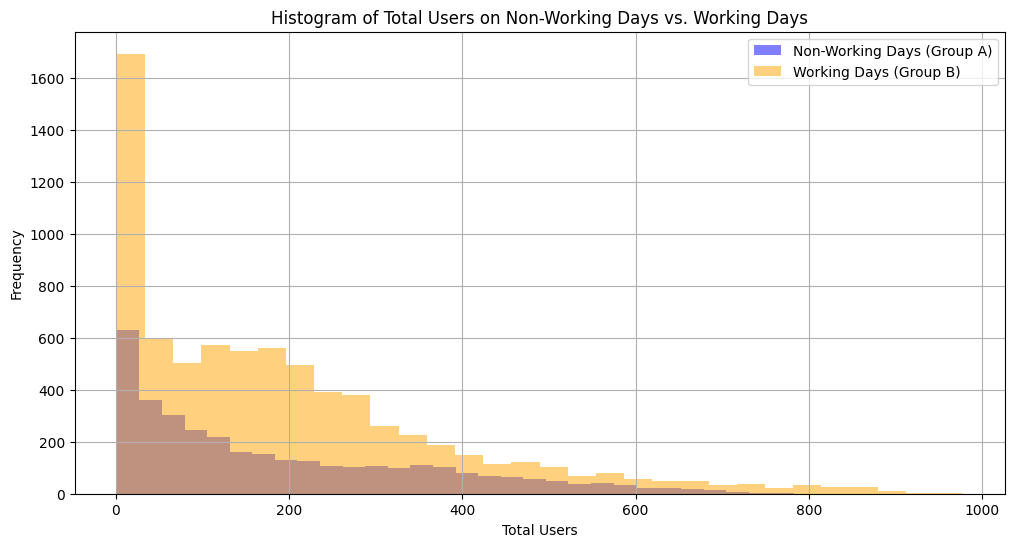

In [12]:
# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(groupA, bins=30, alpha=0.5, label='Non-Working Days (Group A)', color='blue')
plt.hist(groupB, bins=30, alpha=0.5, label='Working Days (Group B)', color='orange')
plt.xlabel('Total Users')
plt.ylabel('Frequency')
plt.title('Histogram of Total Users on Non-Working Days vs. Working Days')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

* The distribution looks right skewed for both groups

In [13]:
# Perform Shapiro-Wilk test for normality on Group A
stat_A, p_value_A = stats.shapiro(groupA)
normality_A = p_value_A >= 0.05

# Perform Shapiro-Wilk test for normality on Group B
stat_B, p_value_B = stats.shapiro(groupB)
normality_B = p_value_B >= 0.05

# Print the results
print(f"Normality of Group A: {'Normal' if normality_A else 'Not Normal'}")
print(f"Normality of Group B: {'Normal' if normality_B else 'Not Normal'}")

Normality of Group A: Not Normal
Normality of Group B: Not Normal


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


* The Shapiro-Wilk test show confirms that distributions for both groups is not normal
* That means a Mann-Whitney U test can be used to check if the variances are equal

In [14]:
 # Check if either group is not normally distributed
if not normality_A or not normality_B:
    # Perform Mann-Whitney U test
    u_stat, mw_p_value = stats.mannwhitneyu(groupA, groupB)
    
    # Print the Mann-Whitney U test results
    print(f"Mann-Whitney U Statistic: {u_stat}, P-Value: {mw_p_value}")

Mann-Whitney U Statistic: 12880792.5, P-Value: 0.9679139953914079


Based on the Mann-Whitney U test results:

* Fail to Reject H₀: There is no statistically significant difference in the number of electric cycles rented on working days compared to non-working days.
* Implication: The data does not provide sufficient evidence to suggest that working days have an effect on the number of electric cycles rented.

### Question 2 - if No. of cycles rented similar or different in different seasons
* H₀: The number of cycles rented is the same across all seasons
* H₁: The number of cycles rented is different in at least one season compared to another

In [15]:
# Map season numbers to names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season'] = df['season'].map(season_map)

# Aggregate data by season
agg_data = df.groupby('season').sum().reset_index()

# Define the custom color palette
season_colors = {
    'Spring': 'lightgreen',
    'Summer': 'green',
    'Fall': 'orange',
    'Winter': 'lightblue'
}

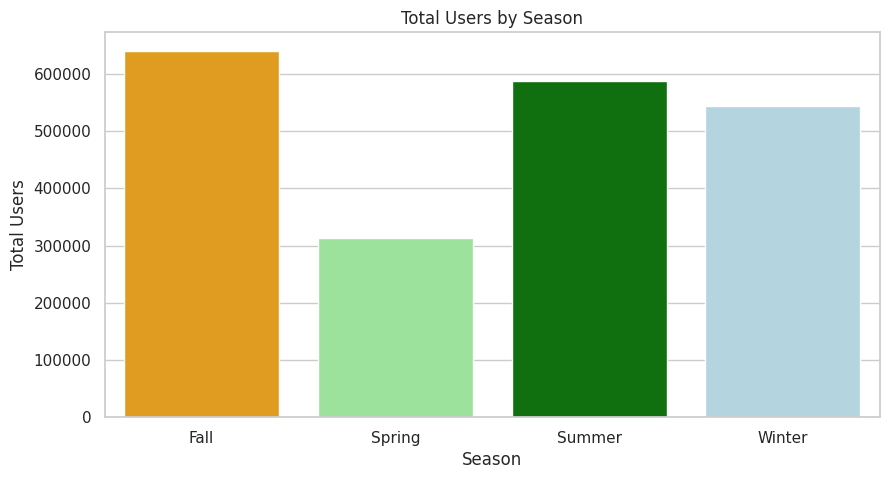

In [16]:
# Set the plot style
sns.set(style="whitegrid")

# Create bar plot for Total Users by Season
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='totalusers', data=agg_data, palette=season_colors)
plt.title('Total Users by Season')
plt.xlabel('Season')
plt.ylabel('Total Users')
plt.show()

* In total the molst bikes were rented during the fall, then suummer and winter
* Durring the sprng the bikes were least rented

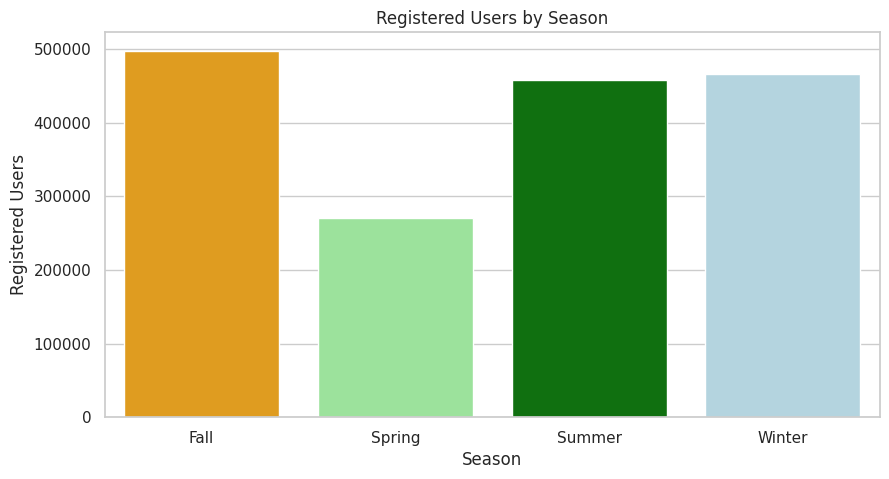

In [17]:
# Set the plot style
sns.set(style="whitegrid")

# Create bar plot for Registered Users by Season
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='registered', data=agg_data, palette=season_colors)
plt.title('Registered Users by Season')
plt.xlabel('Season')
plt.ylabel('Registered Users')
plt.show()

* The registerd users rented more bikes during the winter ranther during the summer in compare to the total users

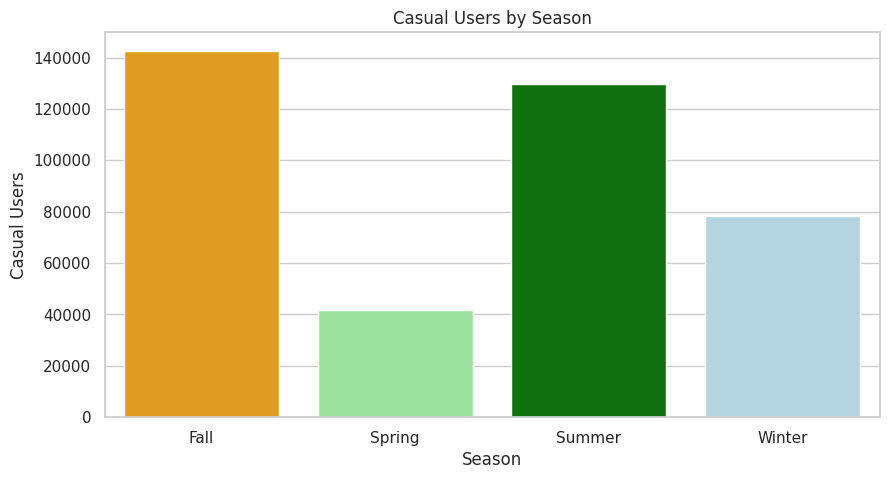

In [18]:
# Set the plot style
sns.set(style="whitegrid")

# Create bar plot for Casual Users by Season
plt.figure(figsize=(10, 5))
sns.barplot(x='season', y='casual', data=agg_data, palette=season_colors)
plt.title('Casual Users by Season')
plt.xlabel('Season')
plt.ylabel('Casual Users')
plt.show()

* The casual users were the most active during the fall and summer

### Selecting appropriate test  

* One-Way ANOVA F-test or Kruskal-Wallis Test. P-value = 0.05

In [19]:
# Mapping dictionary
season_mapping = {
    'Spring': 1,
    'Summer': 2,
    'Fall': 3,
    'Winter': 4
}

# Apply the mapping
df['season'] = df['season'].map(season_mapping)

# Display the DataFrame with the new column
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,totalusers,year,month
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12


In [20]:
# splitting the data
spring = df[df['season'] == 1]['totalusers']
summer = df[df['season'] == 2]['totalusers']
fall = df[df['season'] == 3]['totalusers']
winter = df[df['season'] == 4]['totalusers']

In [21]:
# Check the sizes of each group
print("Spring group size:", len(spring))
print("Summer group size:", len(summer))
print("Fall group size:", len(fall))
print("Winter group size:", len(winter))

Spring group size: 2686
Summer group size: 2733
Fall group size: 2733
Winter group size: 2734


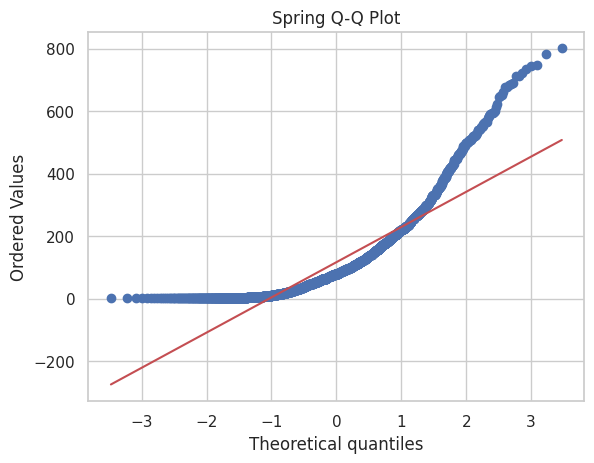

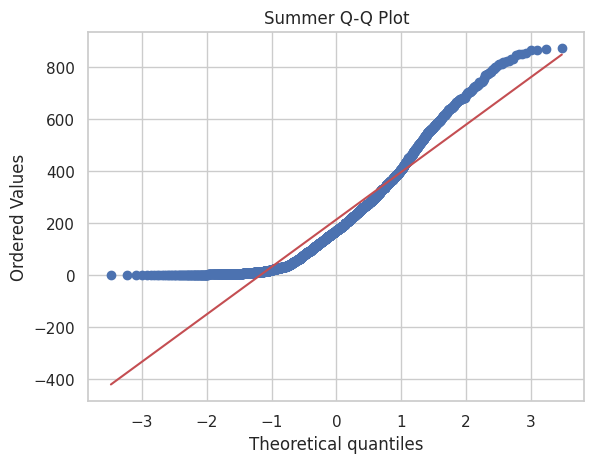

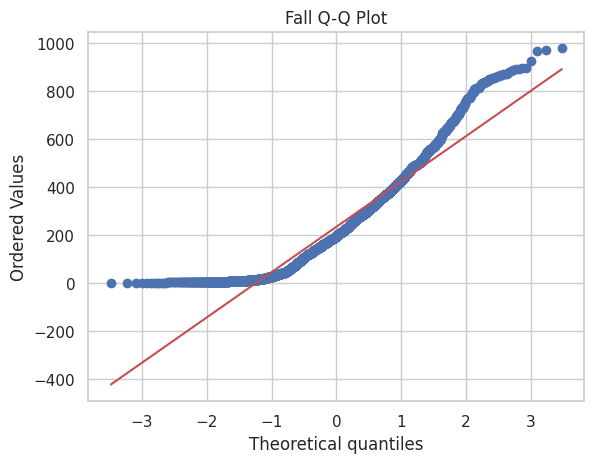

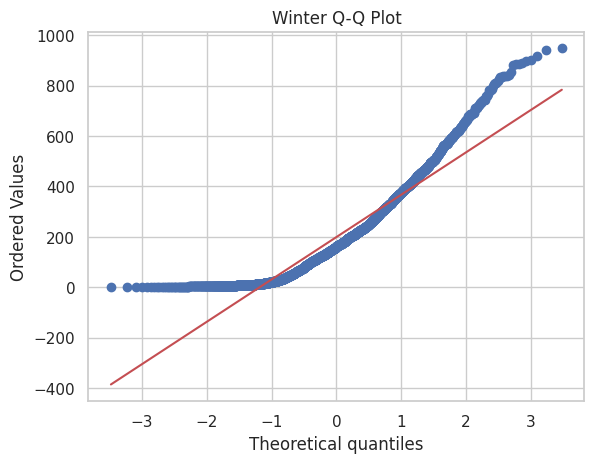

In [22]:
def plot_qq(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

plot_qq(spring, "Spring Q-Q Plot")
plot_qq(summer, "Summer Q-Q Plot")
plot_qq(fall, "Fall Q-Q Plot")
plot_qq(winter, "Winter Q-Q Plot")

* The vissual suggest that there is no linearity acress all seasons

In [23]:
from scipy.stats import shapiro

_, p_spring = shapiro(spring)
_, p_summer = shapiro(summer)
_, p_fall = shapiro(fall)
_, p_winter = shapiro(winter)

print(f'Shapiro-Wilk Test p-value for Spring: {p_spring}')
print(f'Shapiro-Wilk Test p-value for Summer: {p_summer}')
print(f'Shapiro-Wilk Test p-value for Fall: {p_fall}')
print(f'Shapiro-Wilk Test p-value for Winter: {p_winter}')

Shapiro-Wilk Test p-value for Spring: 0.0
Shapiro-Wilk Test p-value for Summer: 6.039093315091269e-39
Shapiro-Wilk Test p-value for Fall: 1.043458045587339e-36
Shapiro-Wilk Test p-value for Winter: 1.1301682309549298e-39


* P-Value Interpretation: All p-values are extremely small (close to 0), which indicates that the null hypothesis of normality is strongly rejected for each season.
* Conclusion: The data in each season group does not appear to be normally distributed. This suggests that the normality assumption for ANOVA is not met.

In [24]:
from scipy.stats import levene

# Perform Levene's Test
stat, p_levene = levene(spring, summer, fall, winter)

print(f'Levene’s Test Statistic: {stat}')
print(f'Levene’s Test p-Value: {p_levene}')

Levene’s Test Statistic: 187.7706624026276
Levene’s Test p-Value: 1.0147116860043298e-118


* Levene's Test checks for the equality of variances among groups. The null hypothesis of Levene's Test is that the variances are equal across groups.

In [25]:
from scipy.stats import kruskal

# Perform the Kruskal-Wallis test
stat, p_value = kruskal(spring, summer, fall, winter)

# Print the results
print(f'Kruskal-Wallis Statistic: {stat}')
print(f'P-Value: {p_value}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Significant differences between seasons.")
else:
    print("Fail to reject the null hypothesis: No significant differences between seasons.")

Kruskal-Wallis Statistic: 699.6668548181988
P-Value: 2.479008372608633e-151
Reject the null hypothesis: Significant differences between seasons.


Kruskal-Wallis Test Results: 

* Reject the Null Hypothesis: The extremely small p-value indicates that there is strong evidence to reject the null hypothesis. In the context of the Kruskal-Wallis test, the null hypothesis states that there are no differences in the distributions of the total users across the different seasons.
* Significant Differences: Because the p-value is so small, concludes that there are significant differences between the distributions of total users across at least some of the seasons.

### Question 3 - if No. of cycles rented similar or different in different weather

* H₀: The number of cycles rented is the same across different weather conditions
* H₁: The number of cycles rented is different in different weather conditions

In [26]:
# Mapping weather conditions to descriptions
weather_map = {
    1: 'Clear',
    2: 'Mist',
    3: 'Snow',
    4: 'Rain'
}

df['weather_desc'] = df['weather'].map(weather_map)

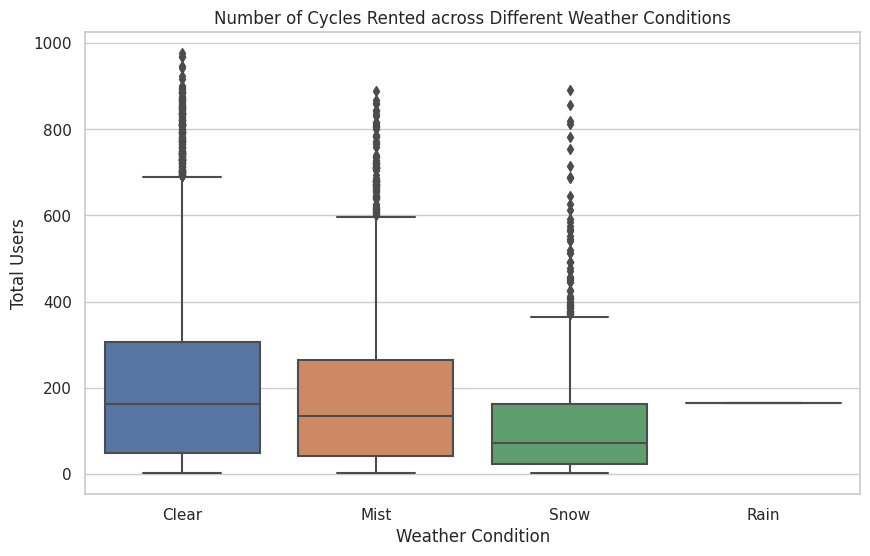

In [27]:
# Visualizing the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_desc', y='totalusers', data=df)
plt.title('Number of Cycles Rented across Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Total Users')
plt.show()

* In total users rented bikes the most during clear and misty weather and less during snow and rain

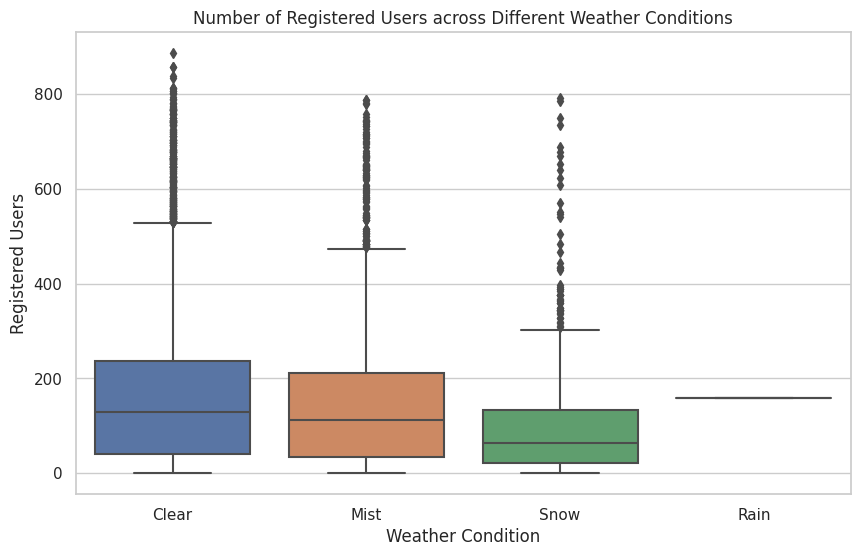

In [28]:
# Visualizing the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_desc', y='registered', data=df)
plt.title('Number of Registered Users across Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Registered Users')
plt.show()

* Registered users rented in similar way than the total users

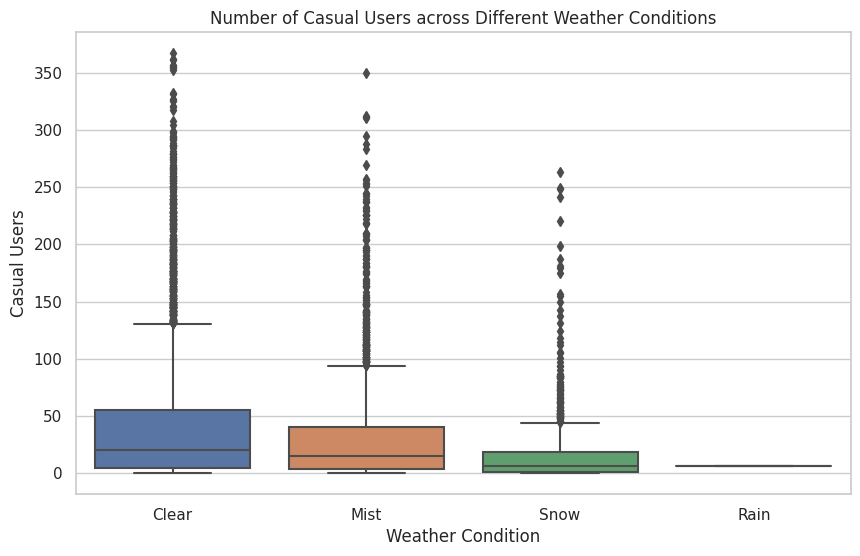

In [29]:
# Visualizing the data
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_desc', y='casual', data=df)
plt.title('Number of Casual Users across Different Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Casual Users')
plt.show()

* Casual users rented almost no bikes during rain

### Selecting appropriate test  

* One-Way ANOVA F-test or Kruskal-Wallis Test. P-value = 0.05

In [30]:
df = df.drop(columns=['weather_desc'])

In [31]:
# Group the data by weather condition
grouped_data = df.groupby('weather')['totalusers']

In [32]:
# Perform Levene's test for homogeneity of variances
stat, p_value = stats.levene(*[group for name, group in grouped_data])
print(f'Levene’s test: Statistics={stat}, p-value={p_value}')

Levene’s test: Statistics=54.85106195954556, p-value=3.504937946833238e-35


* P-value: The extremely low p-value indicates that there is a significant difference in variances across the groups & this suggests that the assumption of equal variances is violated
* Given that the homogeneity of variances assumption is not met i am going to use the Kruskal-Wallis test

In [33]:
# Perform Kruskal-Wallis test
stat, p_value = stats.kruskal(*[group for name, group in grouped_data])
print(f'Kruskal-Wallis test: Statistics={stat}, p-value={p_value}')

Kruskal-Wallis test: Statistics=205.00216514479087, p-value=3.501611300708679e-44


Given the results of the Kruskal-Wallis test:

* P-value: The extremely low p-value indicates that there is a significant difference in the number of cycles rented across different weather conditions
* Reject the Null Hypothesis (H₀): There is sufficient evidence to conclude that the number of cycles rented is significantly different across different weather conditions

### Question 4 - if weather is dependent on season (check between 2 predictor variable)

* Null Hypothesis (H₀): The weather is independent of the season
* Alternative Hypothesis (H₁): The weather is dependent on the season

In [34]:
 unique_weather_values = df['weather'].unique()
print('Unique values in the weather column:', unique_weather_values)

Unique values in the weather column: [1 2 3 4]


In [35]:
 # Define mappings
weather_mapping = {1: "Clear", 2: "Mist", 3: "Snow", 4: "Rain"}
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Map the columns
df['weather'] = df['weather'].map(weather_mapping)
df['season'] = df['season'].map(season_mapping)

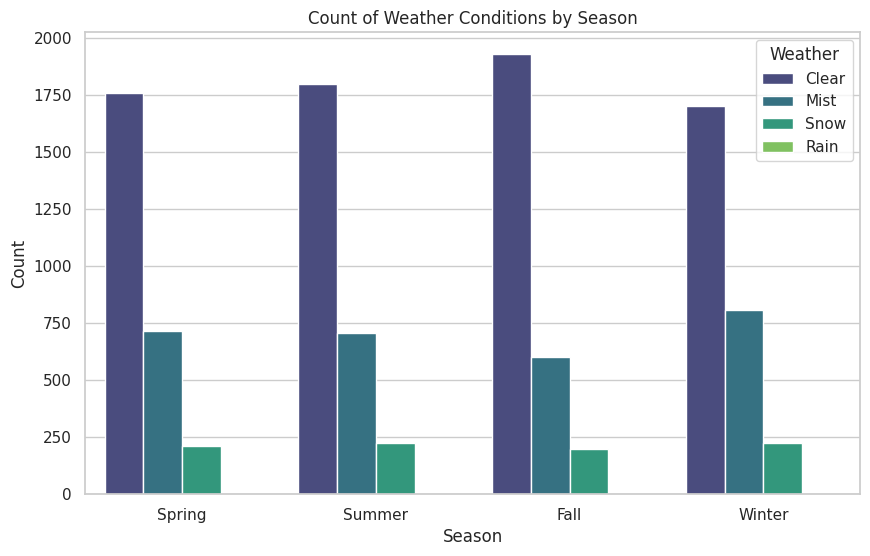

In [36]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='season', hue='weather', palette='viridis')
plt.title('Count of Weather Conditions by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Weather')
plt.show()

* The visual shows small differences regarding the weather in the seasons

In [37]:
# Original mappings
weather_mapping = {1: "Clear", 2: "Mist", 3: "Snow", 4: "Rain"}
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Reverse the mappings
reverse_weather_mapping = {value: key for key, value in weather_mapping.items()}
reverse_season_mapping = {value: key for key, value in season_mapping.items()}

# Map the columns using reversed mappings
df['weather'] = df['weather'].map(reverse_weather_mapping)
df['season'] = df['season'].map(reverse_season_mapping)

### Selecting appropriate test  

* Chi-Square Test of Independence and P-value = 0.05

In [38]:
# Create a contingency table
contingency_table = pd.pivot_table(df, values='totalusers', index='weather', columns='season', aggfunc='sum', fill_value=0)

print("Contingency Table:\n", contingency_table)

Contingency Table:
 season        1       2       3       4
weather                                
1        223009  426350  470116  356588
2         76406  134177  139386  157191
3         12919   27755   31160   30255
4           164       0       0       0


In [39]:
# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

Chi-Square Statistic: 11769.559450959445
P-Value: 0.0
Degrees of Freedom: 9
Expected Frequencies Table:
 [[2.21180553e+05 4.16375587e+05 4.53449224e+05 3.85057636e+05]
 [7.59953534e+04 1.43062351e+05 1.55800469e+05 1.32301826e+05]
 [1.52975188e+04 2.87978002e+04 3.13619255e+04 2.66317555e+04]
 [2.45745681e+01 4.62619795e+01 5.03810967e+01 4.27823557e+01]]


In [40]:
# Check if any expected frequency is less than 5
if (expected < 5).any():
    print("Warning: Some expected frequencies are less than 5.")
else:
    print("All expected frequencies are at least 5.")

All expected frequencies are at least 5.


Chi-Square Statistic results:

* All expected frequencies are above 5, so the assumption of having expected frequencies greater than 5 is satisfied
* A high Chi-Square statistic indicates a large difference between observed and expected frequencies
* A p-value of 0.0 (effectively zero) is extremely small, which indicates strong evidence against the null hypothesis

Conclusion:

* Since the p-value is very small (0.0), you reject the null hypothesis. This suggests that there is a significant relationship between weather and season in your data. In other words, the number of totalusers across different weather conditions varies depending on the season

## Business Recommendations

1. Effect of Working Days on Electric Cycles Rented
Result: Fail to Reject H₀ – There is no statistically significant difference in the number of electric cycles rented on working days compared to non-working days.

##### Recommendation: Since working days do not significantly affect the number of electric cycles rented, focus on other factors that could impact rental rates. For example: 

* Marketing campaigns or promotions could be targeted more effectively by considering variables like weather, seasons, or local events rather than just differentiating between working and non-working days.

2. Number of Cycles Rented Across Seasons
Result: Reject the Null Hypothesis – There are significant differences in the number of cycles rented across different seasons.

##### Recommendation: Adjust your rental strategy based on seasonal trends. For example:

* Peak Seasons: During high rental seasons, consider increasing the number of available cycles and staffing to handle higher demand.
* Off-Seasons: During low rental seasons, offer promotions or discounts to encourage rentals and maintain steady usage.
* Seasonal Marketing: Tailor marketing strategies to align with the seasonal patterns observed to maximize engagement and rentals.

3. Number of Cycles Rented Across Different Weather Conditions
Result: Reject the Null Hypothesis – There is a significant difference in the number of cycles rented across different weather conditions.

##### Recommendation: Optimize your rental operations based on weather patterns:

* Weather Forecasts: Use weather forecasting data to predict rental demand. For instance, increase cycle availability and staff during favorable weather conditions.
* Weather-Based Pricing: Implement dynamic pricing or promotions based on weather forecasts. Offer discounts on rainy days or increase rates on sunny days if demand surges.
* Weather Preparedness: Ensure cycles are well-maintained and equipped to handle various weather conditions (e.g., waterproof features).

4. Dependence of Weather on Season
Result: Reject the Null Hypothesis – There is a significant relationship between weather and season.

##### Recommendation: Consider the interplay between seasons and weather when planning your rental operations:

* Seasonal Adjustments: Align your cycle inventory and marketing strategies with seasonal weather patterns. For example, offer different types of cycles suited to different weather conditions (e.g., more durable options for wet seasons).
* Predictive Planning: Develop predictive models to better understand how different weather patterns within each season affect rental behavior. This can help in inventory management and staff scheduling.

5. General Business Strategies:
* Data-Driven Decisions: Continuously analyze rental data to refine strategies and adapt to changing trends in weather, seasons, and customer behavior.
* Customer Segmentation: Use insights to segment your customers based on their preferences related to seasons and weather, and tailor your services and promotions accordingly.
* Technology Integration: Implement technology solutions that can provide real-time data on weather conditions, customer preferences, and seasonal trends to make informed decisions.